In [1]:
import os, sys; sys.path.insert(0, '/home/trax/trax/website');
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "trax.settings"); import django; django.setup()
from tracks.models import Laptime

import matplotlib.pyplot as plt; import numpy as np; import sklearn; import pandas; import pylab
from django_pandas.io import read_frame

In [2]:
ls = Laptime.objects.all().order_by('player__defaultspeedmultiplier').select_related("player", "track", "vehicle")
l = ls[4]
l

<Laptime: law-of11k-hours Jester (Racecar)>

In [4]:
len(ls)

4778

In [5]:
df = read_frame(ls, fieldnames='track player__username vehicle__name millis_per_km vehicle__name vehicle__cc_millis_per_km'.split())
df.columns = ["track", "user", "vehicle", "millis_per_km", "cc_millis_per_km"]
# add comparison factor for user's millis to broughys millis
df['factor'] = pandas.Series(df.millis_per_km / df.cc_millis_per_km)

In [6]:
# get rid of outliers
q = df["factor"].quantile(0.9)
d2 = df[df["factor"] < q]

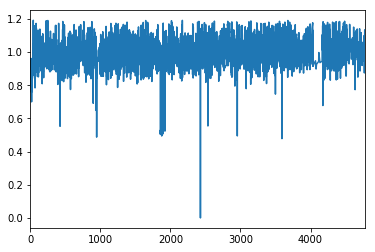

In [7]:
# all factors without outliers
# p = df["factor"]
# p.plot()
p1 = d2["factor"]
p1.plot()
pylab.show()

In [53]:
MÜLL
df["usergroup"] = df["user"].apply(lambda x: x)
df.groupby("usergroup")

In [10]:
plt.boxplot_frame_groupby(df)
pylab.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'boxplot_frame_groupby'

In [52]:
pandas.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

,A,B,C,D,E
0,0.100080,0.854954,0.264603,0.691615,0.716892
1,0.192392,0.993862,0.487273,0.128545,0.541286
2,0.947816,0.923699,0.834418,0.426552,0.560064
3,0.891635,0.598437,0.474494,0.650938,0.971475
4,0.180480,0.679458,0.579854,0.917437,0.365245
5,0.785697,0.540084,0.150067,0.579005,0.951232
6,0.571493,0.110758,0.569167,0.071267,0.073609
7,0.727015,0.556342,0.256808,0.677769,0.699883
8,0.589915,0.868187,0.915272,0.817897,0.331520
9,0.382842,0.006132,0.315041,0.609432,0.202716


In [38]:

import itertools
from pandas.tools.plotting import boxplot_frame_groupby
tuples = [t for t in itertools.product(range(1000), range(4))]
index = pandas.MultiIndex.from_tuples(tuples, names=['lvl0', 'lvl1'])
data = np.random.randn(len(index),4)
df = pandas.DataFrame(data, columns=list('ABCD'), index=index)

grouped = df.groupby(level='lvl1')
boxplot_frame_groupby(grouped)

grouped = df.unstack(level='lvl1').groupby(level=0, axis=1)
# boxplot_frame_groupby(grouped, subplots=False)
# pylab.show()
df

A         B         C         D
lvl0 lvl1                                        
0    0     1.037234 -0.131072 -0.630253  0.207825
     1    -0.790533 -0.166950 -0.509833  1.021970
     2     1.121644 -0.037015  0.030709 -1.391198
     3     1.794266 -0.584101 -0.702191 -1.797148
1    0    -0.367077  0.598757  1.161980 -1.095347
     1     1.650469 -0.121776 -1.130366  0.090755
     2    -0.606585 -1.372448 -0.233941  1.040336
     3    -1.741796  0.497184 -0.069335 -0.475822
2    0    -0.732036  0.532453 -1.126113 -0.148860
     1     0.242468  1.573469  0.392710 -0.368261
     2    -0.765153 -0.382160  0.011847  0.112543
     3     0.114847  1.567667 -0.230247  0.693603
3    0     2.252577 -0.809137  0.349943  0.495256
     1    -0.101655 -1.121743 -0.558346 -1.344632
     2     1.197552 -1.012816 -0.603643 -0.340096
     3    -1.222104 -0.825593 -0.013635  1.322623
4    0    -0.668481  0.234923  0.911751 -1.098247
     1     0.611709 -0.367818  1.581235 -1.319264
     2    -2.016797  0.413958  0.852004  1.175787
     3    -0.279463  0.192337  1.764994  0.162347
5    0     0.402730  0.996482 -0.395128 -0.013840
     1     0.621986 -0.583754  0.142636 -0.874932
     2     1.298750 -1.714110  0.282662  0.698525
     3    -0.268268 -1.737733 -0.968238 -0.315662
6    0    -0.672817  0.551330  0.051940  1.024918
     1     1.116194 -0.958255 -0.323179 -0.356206
     2    -0.745336 -0.238441  1.650456  0.376522
     3     1.012349 -0.958845  0.525263  0.710771
7    0     0.770052 -0.627664  1.546957  0.434225
     1    -1.093304 -1.753206 -0.429491 -0.704373
...             ...       ...       ...       ...
992  2     0.735160  1.135372 -0.158876 -0.253111
     3    -0.905235  1.733026  0.151235 -0.710076
993  0    -0.395200 -0.585855  0.306544 -0.743348
     1    -0.849522  0.367174 -1.868907 -0.589423
     2    -0.657082  0.958811  2.563504 -0.760427
     3    -1.012479  1.039202  0.406111 -0.714200
994  0    -0.759811 -1.299131  0.956670 -2.196856
     1     1.350195  0.814285 -0.531620 -0.388837
     2    -0.526952  1.559027 -1.626518 -1.002361
     3     0.960374  0.170227 -0.620980 -0.034101
995  0     2.195378  1.094035 -0.379494  1.888917
     1    -0.426803 -0.587423 -2.083089 -0.429638
     2     0.153566 -0.098318 -2.090262 -1.038682
     3    -0.088220 -1.561281 -1.739887 -1.091735
996  0    -0.352882  0.606018 -0.621756  1.704960
     1    -0.404691  1.252860 -0.254731  1.611457
     2    -1.834375 -0.389918 -0.434337 -0.004427
     3     0.801324 -0.725113  1.616316 -0.124851
997  0     0.408135  0.699071 -1.374958  2.616838
     1     0.527522 -1.313852  0.106142 -0.735446
     2    -0.347176 -1.672608 -0.855823  0.101256
     3    -0.547187 -1.165161  0.757301 -0.471222
998  0     0.777989 -0.866290  0.078288 -0.810593
     1     0.664134 -1.662360 -0.854448 -1.886010
     2     0.932448 -1.026190  1.913659 -0.627087
     3    -0.473102  1.572455  0.448506 -0.315747
999  0    -1.000346 -0.753827  1.042781 -0.215304
     1    -0.816334  0.013106 -0.693447  0.163932
     2    -0.629821 -0.143060  0.451467  0.108889
     3    -0.113360  0.342278 -0.394479 -0.570539

[4000 rows x 4 columns]

In [30]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [32]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

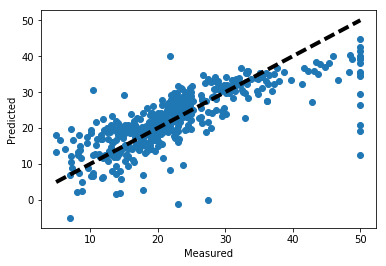

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
